In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#converting the csv file into pandas data frame
bombik = pd.read_csv("day.csv")
bombik.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bombik.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
#check if there are any null values in the data set
bombik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#There are no null values found.
#There are some categorical fileds like season, mnth, weekday, weathersit

In [6]:
bombik.shape

(730, 16)

<AxesSubplot:>

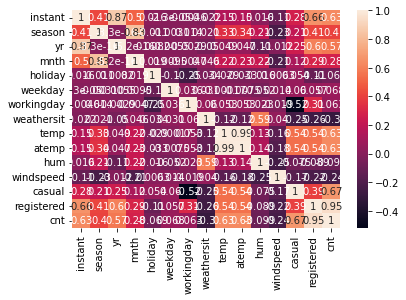

In [7]:
sns.heatmap(bombik.corr(), annot=True, )

In [10]:
#checking if there are any duplicate rows and drop them if any
bombik.drop_duplicates(subset=None, inplace=True)

In [11]:
bombik.shape

(730, 16)

In [12]:
#the shape of the data frame is same before and after drop duplicate, hence there are no duplicate rows

In [13]:
# removing the fileds or variables which are not necessary
# dteday is not necessary as there are seperate columns/fileds/variables which define yr,mnth
#instant is an index column so it is not required or necessay 
#casual and registered columns define users count with guest and registered. The business requirement for this task is to analyze the total count not
# on casual or registered, hece we can remove these columns

In [14]:
bombik.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
#creating new data frame removing the unnecessary columns
bombik_latest = bombik[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [16]:
bombik_latest.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bombik_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [18]:
#Creating dummy variabels for categorical variables
#first we need to convert the datatype of categorical variables to type category
bombik_latest.season = bombik_latest.season.astype("category")
bombik_latest.mnth = bombik_latest.mnth.astype("category")
bombik_latest.weekday = bombik_latest.weekday.astype("category")
bombik_latest.weathersit = bombik_latest.weathersit.astype("category")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
bombik_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [20]:
#creating dummy variables using get_dummies function which also original variables
#drop_first=True will drop first dummy variable for each set of dummies created
bombik_latest = pd.get_dummies(bombik_latest, drop_first=True)

In [21]:
bombik_latest.shape

(730, 30)

In [22]:
bombik_latest.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
bombik_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [24]:
#Splitting the data for training and test
bombik_latest_train, bombik_latest_test = train_test_split(bombik_latest, train_size=0.70, random_state=100)

In [25]:
bombik_latest_train.shape

(510, 30)

In [26]:
bombik_latest_test.shape

(220, 30)

In [27]:
#Performing EDA on training data set

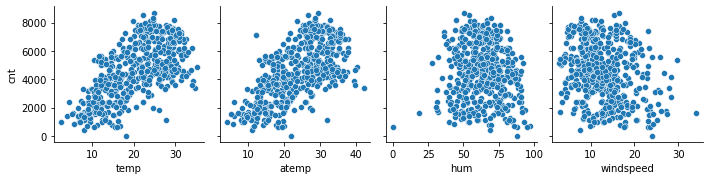

In [28]:
#pairplot for numeric variables
sns.pairplot(data=bombik_latest_train, x_vars=["temp","atemp","hum","windspeed"], y_vars="cnt")

In [29]:
# It seems that temp and atemp variables are have linear relationship with cnt variable/column

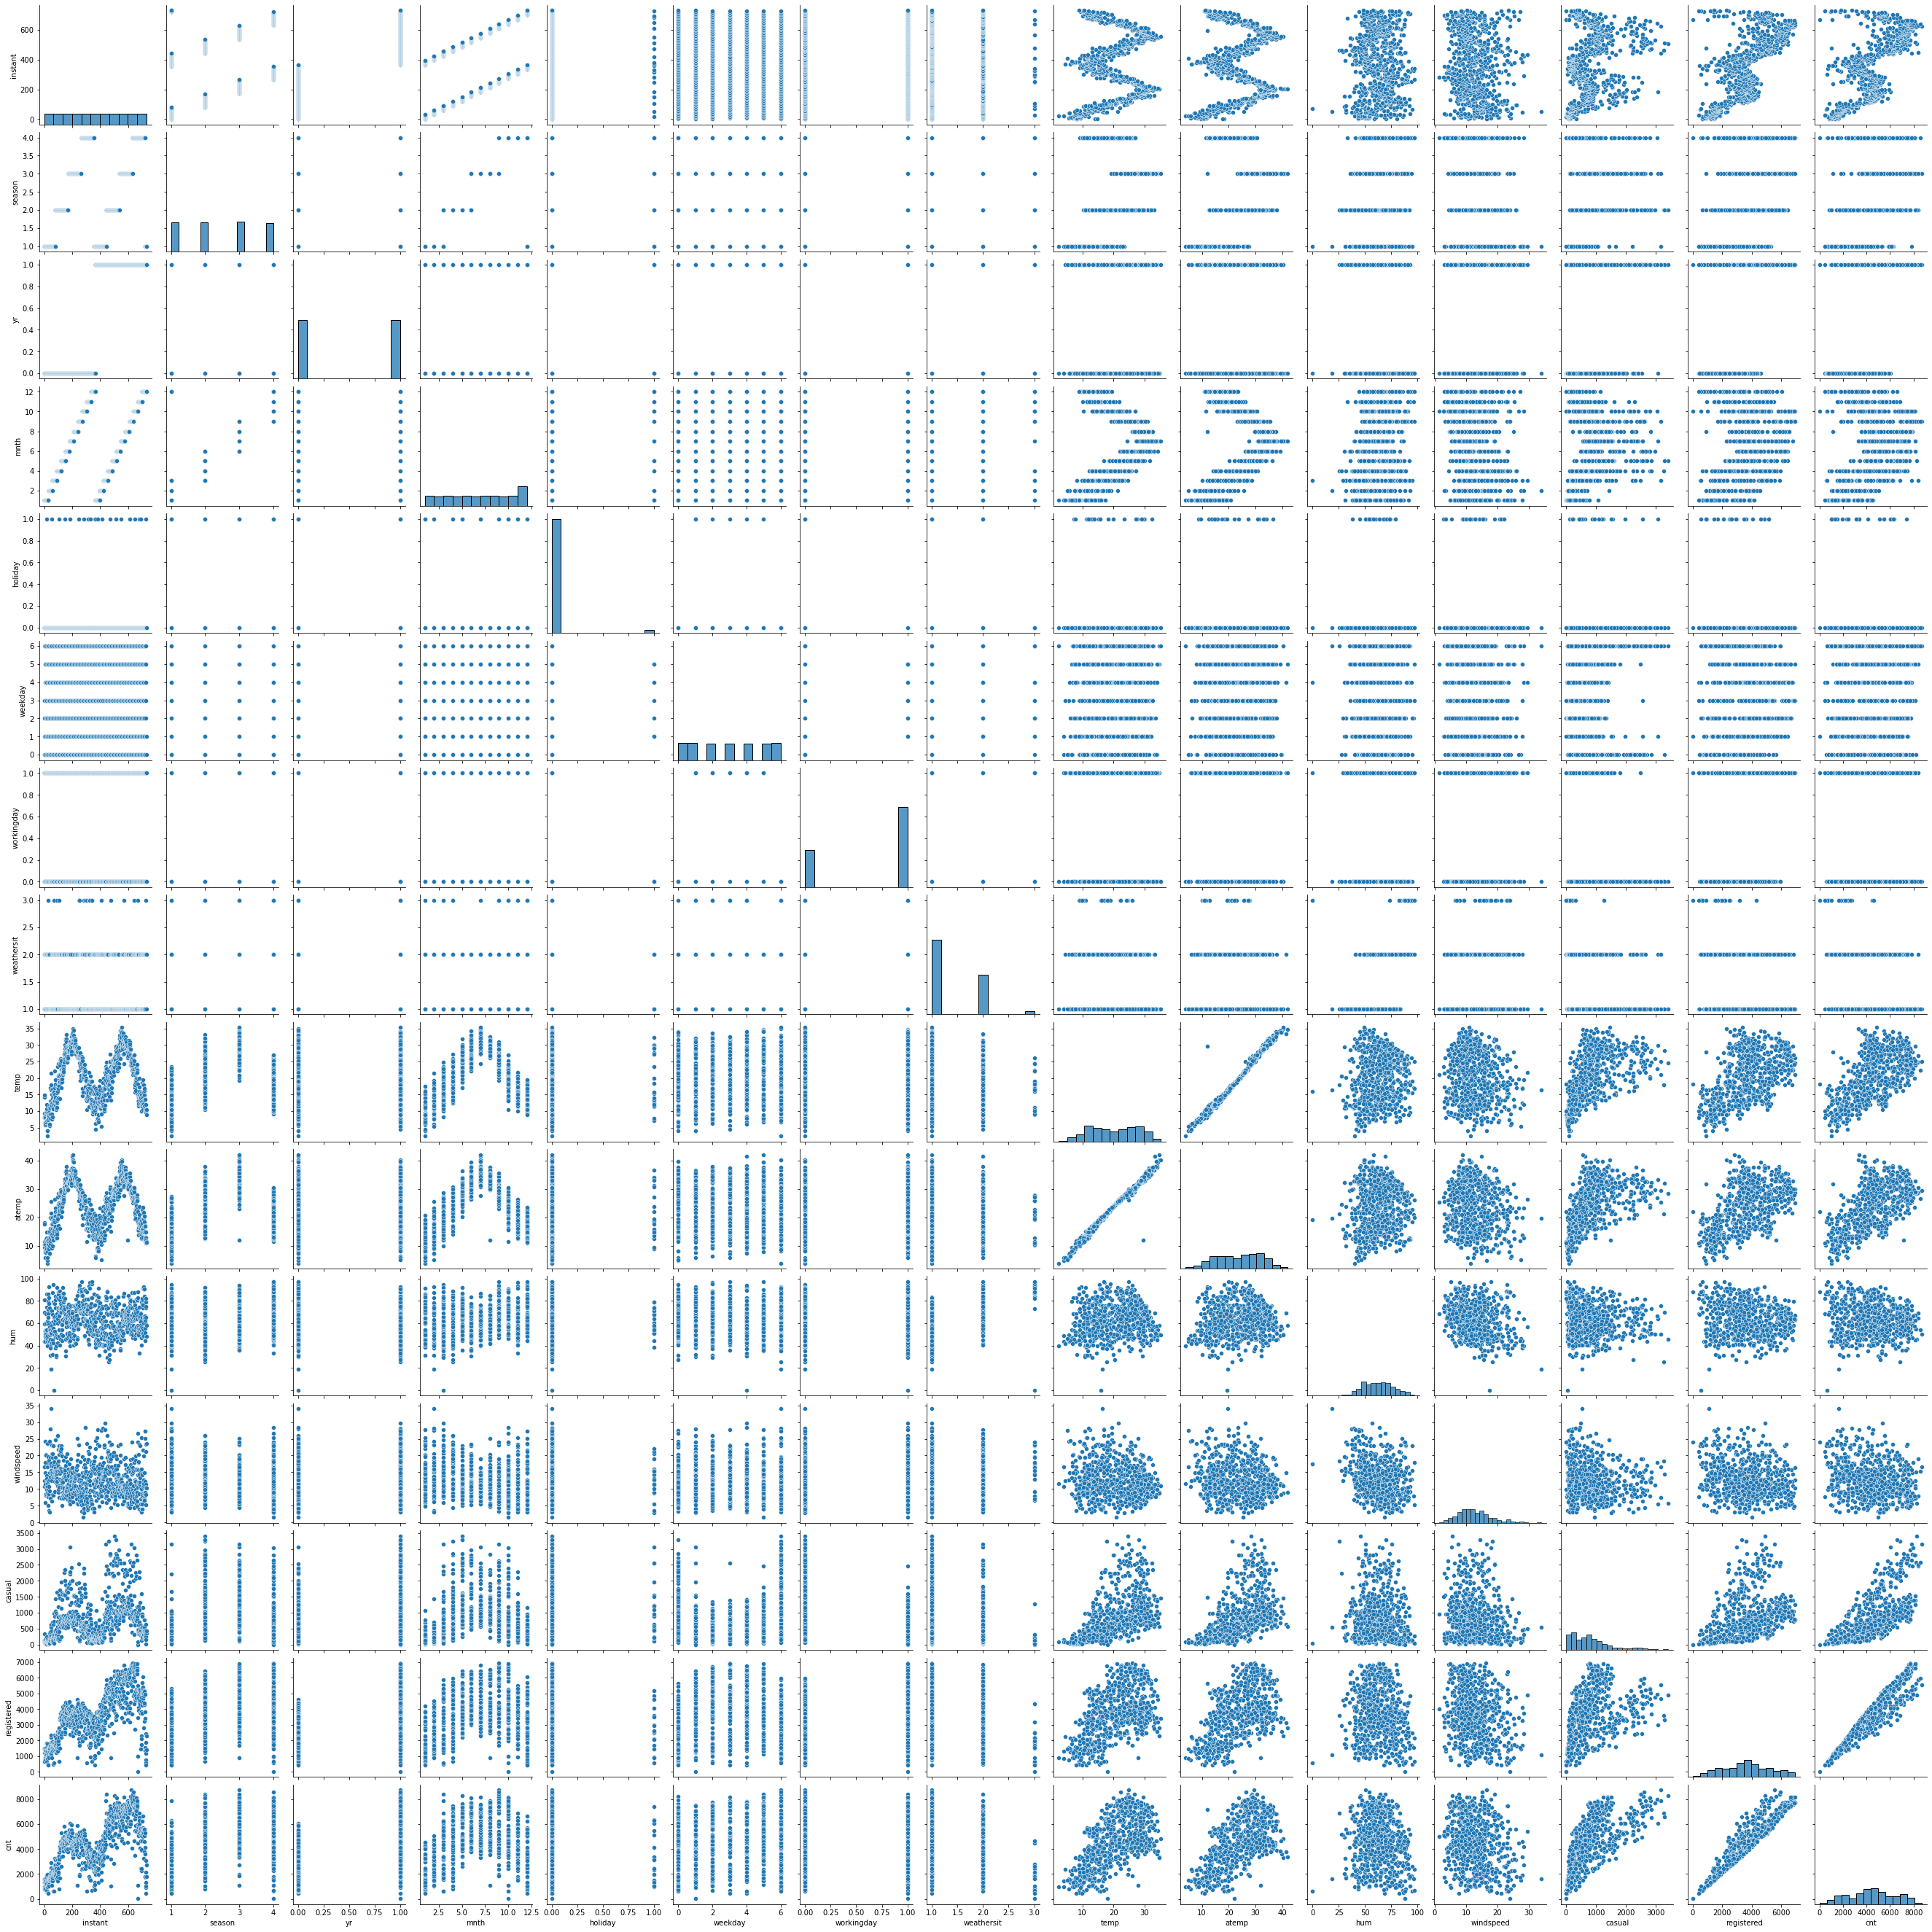

<Figure size 1152x720 with 0 Axes>

In [30]:
sns.pairplot(bombik)
plt.figure(figsize=(16,10))
plt.show()

In [31]:
bombik_latest_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weathersit'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>]],
      dtype=object)

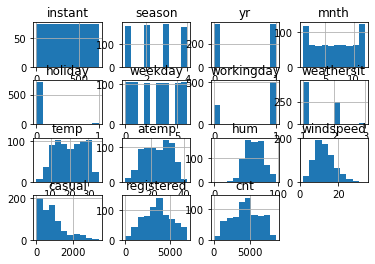

In [32]:
bombik.hist()

<AxesSubplot:>

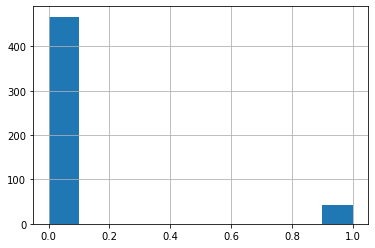

In [33]:
bombik_latest_train.mnth_10.hist()

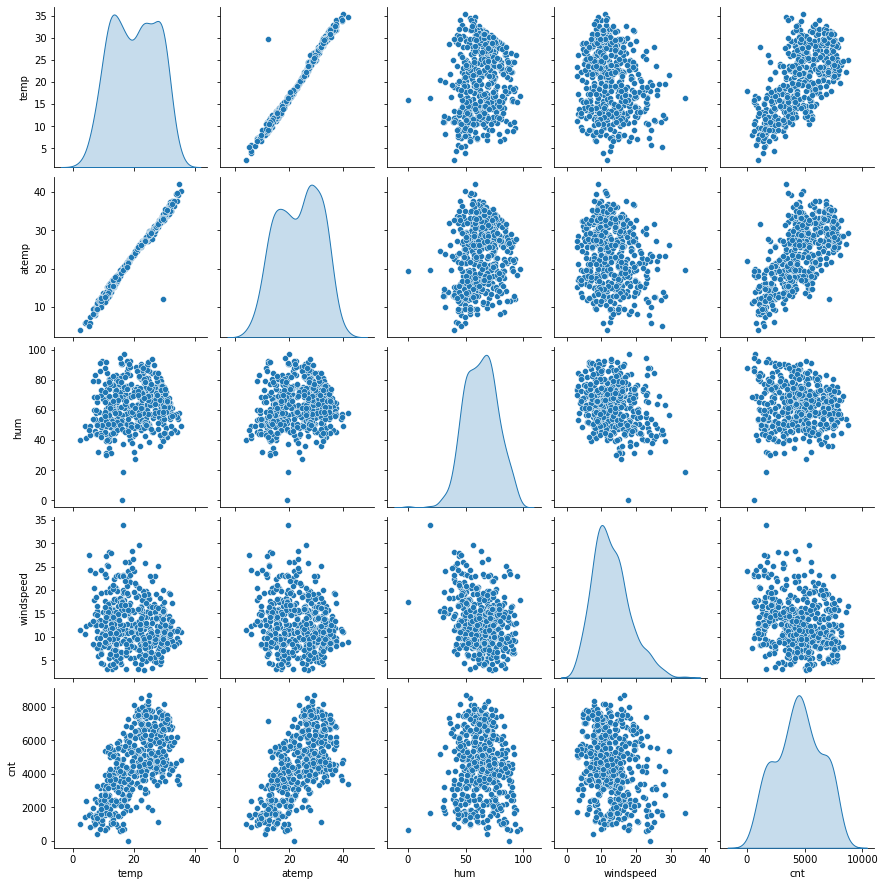

In [34]:

sns.pairplot(bombik_latest_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']], diag_kind="kde")

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

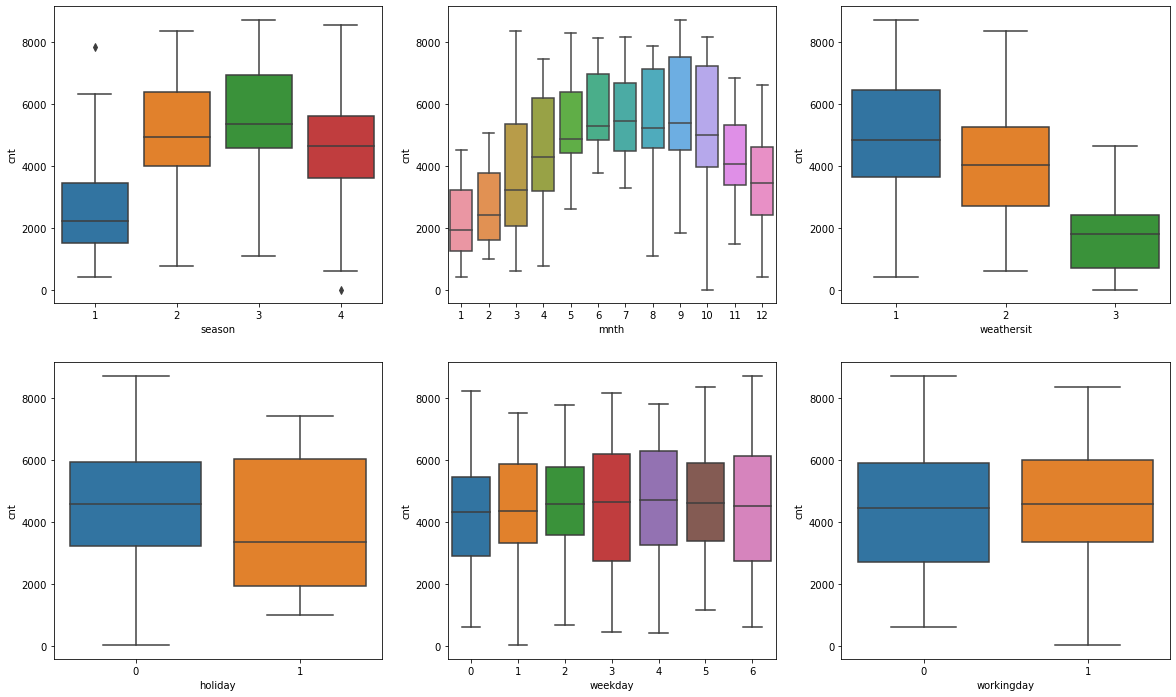

In [37]:
#visualizing the categorical variables using boxplot
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="season", y="cnt", data=bombik)
plt.subplot(2,3,2)
sns.boxplot(x="mnth", y="cnt", data=bombik)
plt.subplot(2,3,3)
sns.boxplot(x="weathersit", y="cnt", data=bombik)
plt.subplot(2,3,4)
sns.boxplot(x="holiday", y="cnt", data=bombik)
plt.subplot(2,3,5)
sns.boxplot(x="weekday", y="cnt", data=bombik)
plt.subplot(2,3,6)
sns.boxplot(x="workingday", y="cnt", data=bombik)

In [38]:
# Season
#There are more number of bookings in season3(fall), then season2(summer) and then season4(winter). all have a median above 5000
#Season can be a good predictor for dependent variable cnt

#mnth
#there is an increase in bike bookings from month 5 to 10, all have median above 5000. It shows the cnt column is dependent on
#mnth column

#weathersit
#bikes are booked mostly in the weather conditions Clear, Few clouds, Partly cloudy, Partly cloudy
# and there is a little decrease in booking for weather conditions Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#there is drastic change in booking in conditions Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
#and no bookings for conditions Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#holiday
#most of the bikes are booked when there is no holiday, here the variable is biased with cnt. The variable holiday is not a good predictor 
#for cnt

#weekday
#all the weekdays maintain similar trend with median between 4000 to 5000.

#Workingday
#most of the bikes are booked in working day when compared to holiday,this is also a good predictor for cnt

<AxesSubplot:>

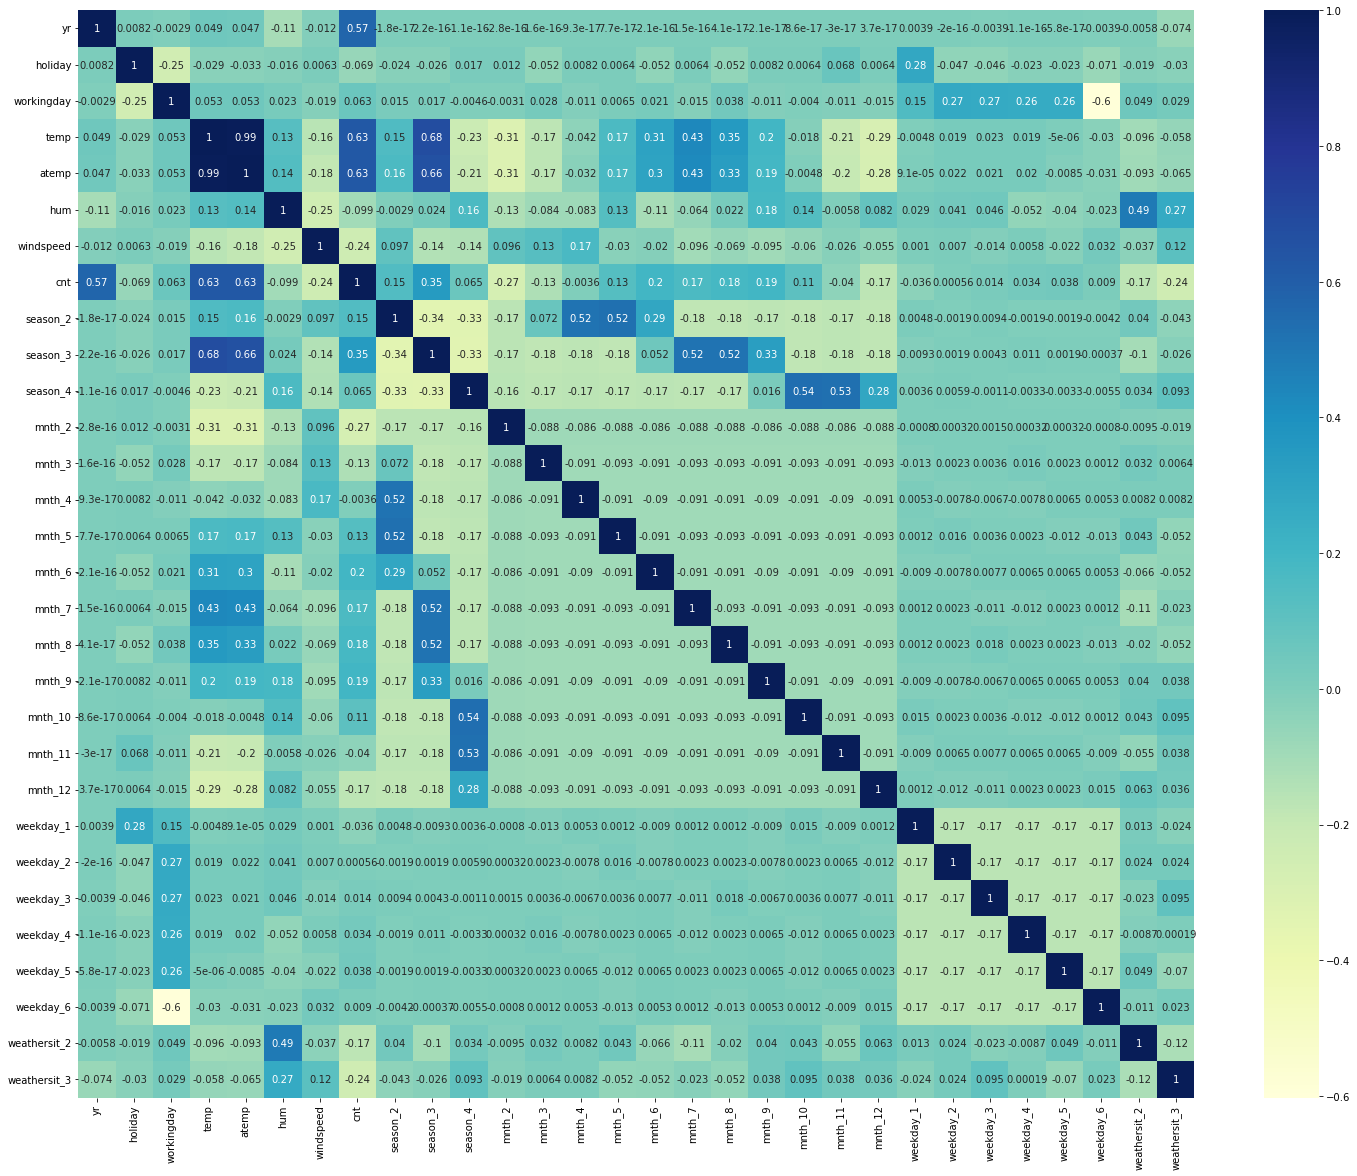

In [39]:
#Using correlation matrix, will check which variables are correlated to eachother
plt.figure(figsize=(25,20))
sns.heatmap(bombik_latest.corr(), annot=True, cmap="YlGnBu")

In [40]:
#rescaling the features usinf minmax

#initialize the object
scaler = MinMaxScaler()

#create list of numeric values
num_vars = ["temp", "atemp", "hum", "cnt", "windspeed"]

#fit and transform
#fit finds the min and max values
#transform does the computation
bombik_latest_train[num_vars] = scaler.fit_transform(bombik_latest_train[num_vars])
bombik_latest_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

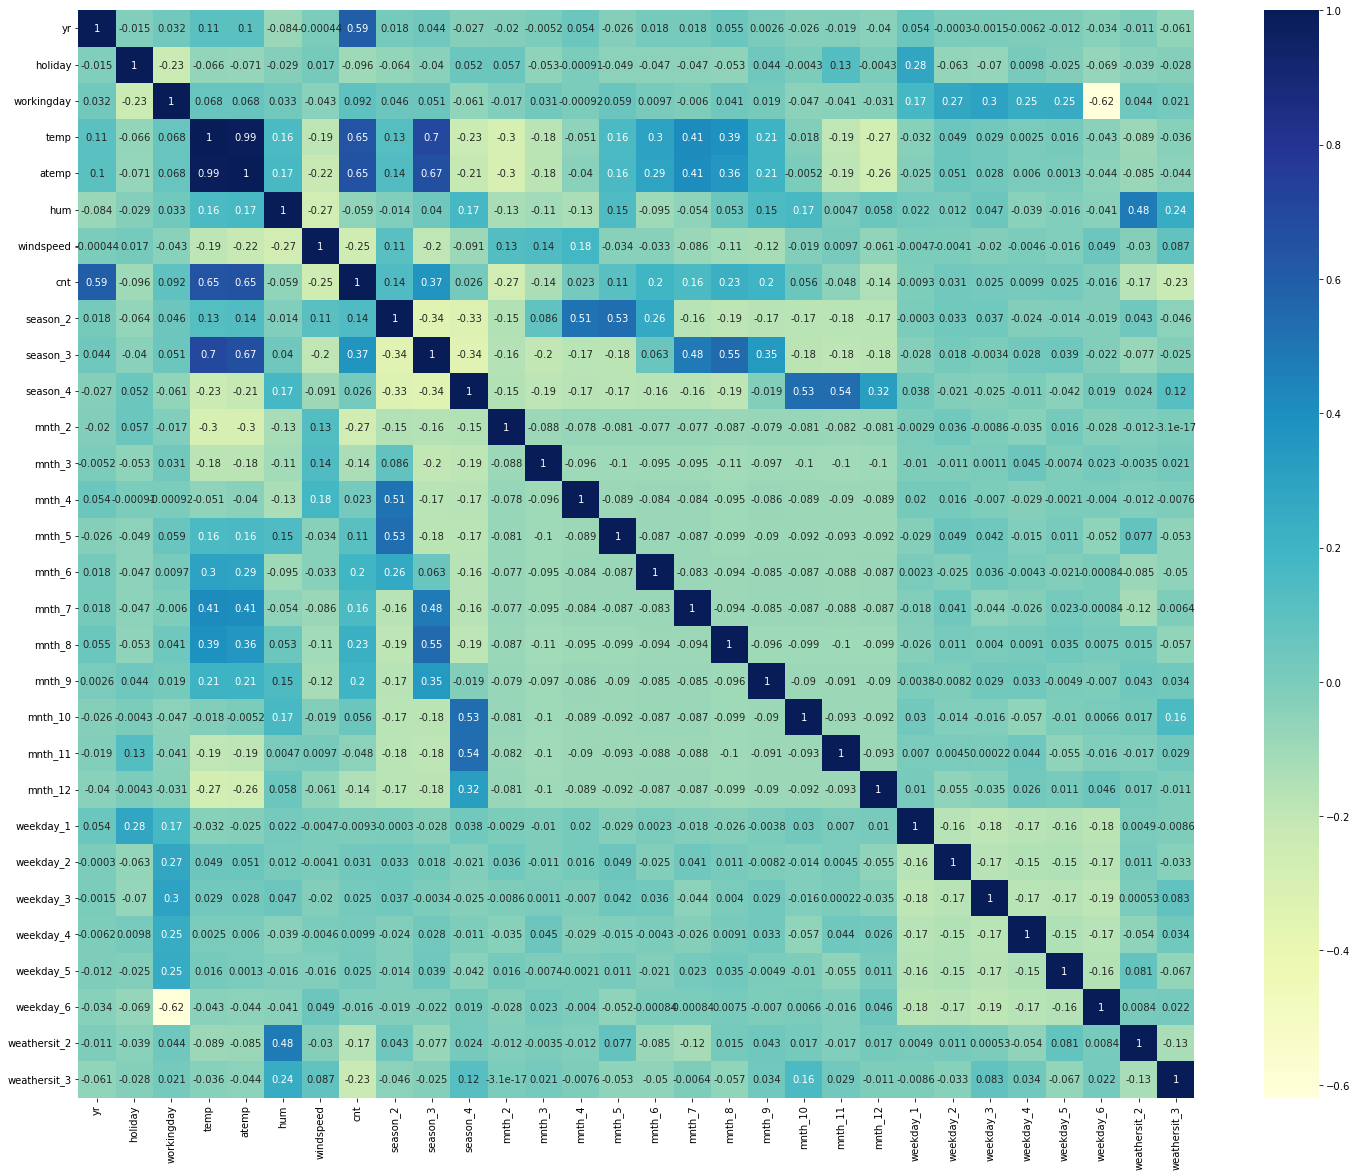

In [41]:
plt.figure(figsize=(25,20))
sns.heatmap(bombik_latest_train.corr(), annot=True, cmap="YlGnBu")

In [42]:
bombik_latest_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [43]:
y_train = bombik_latest_train.pop('cnt')
X_train = bombik_latest_train

In [45]:
#using RFE
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [48]:
clms = X_train.columns[rfe.support_]
clms

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [50]:
#creating X_test data frame with RFE selected variables or columns
X_train_rfe = X_train[clms]
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,1,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,1,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,0,0,0,0,1,0


In [51]:
#checking the VIF values for the columns or variables
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.91


In [57]:
#adding constant
X_train_sm = sm.add_constant(X_train_rfe)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
#creating the first model
lr1 = sm.OLS(y_train, X_train_sm)

#fit
lr1_model = lr1.fit()

#params
lr1_model.params

const           0.195221
yr              0.230148
holiday        -0.054466
workingday      0.044468
temp            0.497208
hum            -0.163900
windspeed      -0.182540
season_2        0.118324
season_3        0.029169
season_4        0.143004
mnth_8          0.047286
mnth_9          0.117613
mnth_10         0.041624
weekday_6       0.053083
weathersit_2   -0.057693
weathersit_3   -0.250689
dtype: float64

In [59]:
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.17e-191
Time:                        18:20:29   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790      0.000       0.139       0.252
yr               0.2301      0.008     28.743      0.000       0.214       0.246
holiday         -0.0545      0.027     -2.025      0.043      -0.107      -0.002
workingday       0.0445      0.012      3.856      0.000       0.022       0.067
temp             0.4972      0.034     14.821      0.000       0.431       0.563
hum             -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed       -0.1825      0.025     -7.196      0.000      -0.232      -0.133
season_2         0.1183      0.015      8.038      0.000       0.089       0.147
season_3         0.0292      0.022      1.329      0.184      -0.014       0.072
season_4         0.1430      0.013     10.671      0.000       0.117       0.169
mnth_8           0.0473      0.017      2.732      0.007       0.013       0.081
mnth_9           0.1176      0.017      6.876      0.000       0.084       0.151
mnth_10          0.0416      0.017      2.391      0.017       0.007       0.076
weekday_6        0.0531      0.015      3.655      0.000       0.025       0.082
weathersit_2    -0.0577      0.010     -5.564      0.000      -0.078      -0.037
weathersit_3    -0.2507      0.026     -9.579      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#Temp variable has high VIF, but we cannot remove as it is dependen on cnt variable.
#removing humidity variable as it has second highest VIF.

In [61]:
X_train_latest = X_train_rfe.drop(["hum"], axis=1)
X_train_latest

,yr,holiday,workingday,temp,windspeed,season_2,season_3,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.380981,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.187140,0,1,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.431816,0,0,1,0,0,0,1,1,0
79,0,0,1,0.462664,0.529881,1,0,0,0,0,0,0,1,0


In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_latest.columns
vif['VIF'] = [variance_inflation_factor(X_train_latest.values, i) for i in range(X_train_latest.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,16.82
6,season_3,7.78
2,workingday,4.45
4,windspeed,3.72
5,season_2,3.42
7,season_4,2.75
0,yr,2.04
8,mnth_8,1.85
11,weekday_6,1.78
10,mnth_10,1.63


In [63]:
X_train_sm = sm.add_constant(X_train_latest)
lr2 = sm.OLS(y_train, X_train_sm)
lr2_model = lr2.fit()
lr2_model.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           0.100338
yr              0.234179
holiday        -0.052426
workingday      0.047540
temp            0.462685
windspeed      -0.150168
season_2        0.121620
season_3        0.042523
season_4        0.139015
mnth_8          0.041739
mnth_9          0.107852
mnth_10         0.039099
weekday_6       0.058080
weathersit_2   -0.083773
weathersit_3   -0.295653
dtype: float64

In [64]:
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.58e-188
Time:                        18:28:32   Log-Likelihood:                 509.66
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     495   BIC:                            -925.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1003      0.019      5.190      0.000       0.062       0.138
yr               0.2342      0.008     28.911      0.000       0.218       0.250
holiday         -0.0524      0.027     -1.914      0.056      -0.106       0.001
workingday       0.0475      0.012      4.055      0.000       0.025       0.071
temp             0.4627      0.033     13.931      0.000       0.397       0.528
windspeed       -0.1502      0.025     -6.075      0.000      -0.199      -0.102
season_2         0.1216      0.015      8.124      0.000       0.092       0.151
season_3         0.0425      0.022      1.921      0.055      -0.001       0.086
season_4         0.1390      0.014     10.210      0.000       0.112       0.166
mnth_8           0.0417      0.018      2.374      0.018       0.007       0.076
mnth_9           0.1079      0.017      6.244      0.000       0.074       0.142
mnth_10          0.0391      0.018      2.207      0.028       0.004       0.074
weekday_6        0.0581      0.015      3.940      0.000       0.029       0.087
weathersit_2    -0.0838      0.009     -9.675      0.000      -0.101      -0.067
weathersit_3    -0.2957      0.025    -12.053      0.000      -0.344      -0.247
==============================================================================
Omnibus:                       77.284   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.987
Skew:                          -0.749   Prob(JB):                     1.13e-45
Kurtosis:                       5.738   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#removing season3 variable which has high VIF 

In [66]:
X_train_latest = X_train_latest.drop(["season_3"], axis=1)
X_train_latest

,yr,holiday,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.380981,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.187140,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.431816,0,1,0,0,0,1,1,0
79,0,0,1,0.462664,0.529881,1,0,0,0,0,0,1,0


In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_latest.columns
vif['VIF'] = [variance_inflation_factor(X_train_latest.values, i) for i in range(X_train_latest.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,season_4,2.00
5,season_2,1.83
10,weekday_6,1.77
9,mnth_10,1.60
7,mnth_8,1.59
11,weathersit_2,1.55


In [69]:
X_train_sm = sm.add_constant(X_train_latest)
lr3 = sm.OLS(y_train, X_train_sm)
lr3_model = lr3.fit()
lr3_model.params

const           0.093743
yr              0.233082
holiday        -0.054099
workingday      0.047315
temp            0.510620
windspeed      -0.152990
season_2        0.101899
season_4        0.126666
mnth_8          0.053932
mnth_9          0.118514
mnth_10         0.034306
weekday_6       0.057825
weathersit_2   -0.083999
weathersit_3   -0.292947
dtype: float64

In [70]:
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.97e-188
Time:                        18:32:10   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0937      0.019      4.914      0.000       0.056       0.131
yr               0.2331      0.008     28.769      0.000       0.217       0.249
holiday         -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday       0.0473      0.012      4.026      0.000       0.024       0.070
temp             0.5106      0.022     23.229      0.000       0.467       0.554
windspeed       -0.1530      0.025     -6.183      0.000      -0.202      -0.104
season_2         0.1019      0.011      9.325      0.000       0.080       0.123
season_4         0.1267      0.012     10.524      0.000       0.103       0.150
mnth_8           0.0539      0.016      3.281      0.001       0.022       0.086
mnth_9           0.1185      0.016      7.226      0.000       0.086       0.151
mnth_10          0.0343      0.018      1.950      0.052      -0.000       0.069
weekday_6        0.0578      0.015      3.912      0.000       0.029       0.087
weathersit_2    -0.0840      0.009     -9.676      0.000      -0.101      -0.067
weathersit_3    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#removing variable month_10 based on high P value
X_train_latest = X_train_latest.drop(["mnth_10"], axis=1)
X_train_latest

,yr,holiday,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,1,1,0
111,0,0,1,0.345824,0.380981,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.187140,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.431816,0,1,0,0,1,1,0
79,0,0,1,0.462664,0.529881,1,0,0,0,0,1,0


In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_latest.columns
vif['VIF'] = [variance_inflation_factor(X_train_latest.values, i) for i in range(X_train_latest.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


In [73]:
X_train_sm = sm.add_constant(X_train_latest)
lr4 = sm.OLS(y_train, X_train_sm)
lr4_model = lr4.fit()
lr4_model.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           0.090297
yr              0.232711
holiday        -0.056011
workingday      0.046317
temp            0.518828
windspeed      -0.150835
season_2        0.100362
season_4        0.138202
mnth_8          0.050952
mnth_9          0.113626
weekday_6       0.056927
weathersit_2   -0.083049
weathersit_3   -0.287225
dtype: float64

In [74]:
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.64e-189
Time:                        18:34:59   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740      0.000       0.053       0.128
yr               0.2327      0.008     28.651      0.000       0.217       0.249
holiday         -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday       0.0463      0.012      3.933      0.000       0.023       0.069
temp             0.5188      0.022     23.980      0.000       0.476       0.561
windspeed       -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_2         0.1004      0.011      9.183      0.000       0.079       0.122
season_4         0.1382      0.011     13.148      0.000       0.118       0.159
mnth_8           0.0510      0.016      3.104      0.002       0.019       0.083
mnth_9           0.1136      0.016      6.991      0.000       0.082       0.146
weekday_6        0.0569      0.015      3.842      0.000       0.028       0.086
weathersit_2    -0.0830      0.009     -9.555      0.000      -0.100      -0.066
weathersit_3    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#removing holiday variable as it has high P value
X_train_latest = X_train_latest.drop(["holiday"], axis=1)
X_train_latest

,yr,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,1,0
111,0,1,0.345824,0.380981,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.187140,0,0,1,0,0,0,0
53,0,1,0.202618,0.111379,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,1,1,0
79,0,1,0.462664,0.529881,1,0,0,0,0,1,0


In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train_latest.columns
vif['VIF'] = [variance_inflation_factor(X_train_latest.values, i) for i in range(X_train_latest.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_2,1.82
8,weekday_6,1.69
6,mnth_8,1.58
9,weathersit_2,1.54
5,season_4,1.51
7,mnth_9,1.30


In [78]:
X_train_sm = sm.add_constant(X_train_latest)
lr5 = sm.OLS(y_train, X_train_sm)
lr5_model = lr5.fit()
lr5_model.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           0.080941
yr              0.232844
workingday      0.054605
temp            0.520838
windspeed      -0.151781
season_2        0.101039
season_4        0.137942
mnth_8          0.051225
mnth_9          0.111729
weekday_6       0.065324
weathersit_2   -0.082579
weathersit_3   -0.285973
dtype: float64

In [79]:
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.31e-189
Time:                        18:40:53   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0809      0.019      4.365      0.000       0.045       0.117
yr               0.2328      0.008     28.578      0.000       0.217       0.249
workingday       0.0546      0.011      4.926      0.000       0.033       0.076
temp             0.5208      0.022     24.022      0.000       0.478       0.563
windspeed       -0.1518      0.025     -6.105      0.000      -0.201      -0.103
season_2         0.1010      0.011      9.220      0.000       0.080       0.123
season_4         0.1379      0.011     13.083      0.000       0.117       0.159
mnth_8           0.0512      0.016      3.111      0.002       0.019       0.084
mnth_9           0.1117      0.016      6.864      0.000       0.080       0.144
weekday_6        0.0653      0.014      4.576      0.000       0.037       0.093
weathersit_2    -0.0826      0.009     -9.474      0.000      -0.100      -0.065
weathersit_3    -0.2860      0.025    -11.664      0.000      -0.334      -0.238
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#removing mnth_8 variable as it has high P value
X_train_latest = X_train_latest.drop(["mnth_8"], axis=1)
X_train_latest

,yr,workingday,temp,windspeed,season_2,season_4,mnth_9,weekday_6,weathersit_2,weathersit_3
576,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,1,0
111,0,1,0.345824,0.380981,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.187140,0,0,0,0,0,0
53,0,1,0.202618,0.111379,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,1,1,0
79,0,1,0.462664,0.529881,1,0,0,0,1,0


In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train_latest.columns
vif['VIF'] = [variance_inflation_factor(X_train_latest.values, i) for i in range(X_train_latest.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


In [82]:
X_train_sm = sm.add_constant(X_train_latest)
lr6 = sm.OLS(y_train, X_train_sm)
lr6_model = lr6.fit()
lr6_model.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           0.075009
yr              0.233139
workingday      0.056117
temp            0.549892
windspeed      -0.155203
season_2        0.088621
season_4        0.130655
mnth_9          0.097365
weekday_6       0.067500
weathersit_2   -0.080022
weathersit_3   -0.287090
dtype: float64

In [83]:
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.13e-188
Time:                        18:43:00   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0750      0.019      4.031      0.000       0.038       0.112
yr               0.2331      0.008     28.370      0.000       0.217       0.249
workingday       0.0561      0.011      5.024      0.000       0.034       0.078
temp             0.5499      0.020     27.861      0.000       0.511       0.589
windspeed       -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_2         0.0886      0.010      8.608      0.000       0.068       0.109
season_4         0.1307      0.010     12.600      0.000       0.110       0.151
mnth_9           0.0974      0.016      6.184      0.000       0.066       0.128
weekday_6        0.0675      0.014      4.693      0.000       0.039       0.096
weathersit_2    -0.0800      0.009     -9.143      0.000      -0.097      -0.063
weathersit_3    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# as all the columns have nearly zero P value. prob(F-stat) is almost zerp and VIF values are low(below 5) the present model is probably the good model

In [93]:
#Hypothesis testing
#H_Null = coefficient values are 0
#H_notnull = coefficient values are not 0
lr6_model.params

const           0.075009
yr              0.233139
workingday      0.056117
temp            0.549892
windspeed      -0.155203
season_2        0.088621
season_4        0.130655
mnth_9          0.097365
weekday_6       0.067500
weathersit_2   -0.080022
weathersit_3   -0.287090
dtype: float64

In [94]:
#As the coefficient values are non zero we reject null hypothesis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

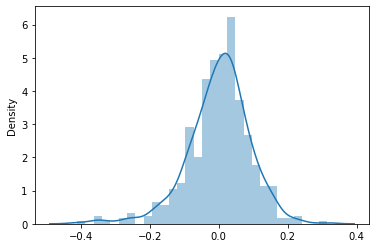

In [98]:
#validating the Assumptions
#error terms are normally distributed with mean zero

y_train_pred = lr6_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)


In [99]:
#From the above plot we can see that the residuals are normally distributed and the mean is 0

In [103]:
#there is no or low multicollinearity between predictor variables, as the VIF value of all the variables are less than 5
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


In [100]:
lr6_model.params

const           0.075009
yr              0.233139
workingday      0.056117
temp            0.549892
windspeed      -0.155203
season_2        0.088621
season_4        0.130655
mnth_9          0.097365
weekday_6       0.067500
weathersit_2   -0.080022
weathersit_3   -0.287090
dtype: float64

In [102]:
#the equation for the best fitted line is 
#cnt = 0.075009 + (yr × 0.233139) + (workingday × 0.056117) + (temp × 0.549892) − (windspeed × 0.155203) + (season2 × 0.088621) + (season4 × 0.130655) + (mnth9 × 0.097365) + (weekday6 × 0.067500) − (weathersit2 × 0.080022) − (weathersit3 × 0.287090)

In [104]:
#Evaluating the test data

In [105]:
num_vars

['temp', 'atemp', 'hum', 'cnt', 'windspeed']

In [106]:
#transform the data
bombik_latest_test[num_vars] = scaler.transform(bombik_latest_test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [107]:
bombik_latest_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [108]:
bombik_latest_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
#get the X and Y values
y_test = bombik_latest_test.pop("cnt")
X_test = bombik_latest_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [110]:
#using the columns that are filtered in training
colms = X_train_latest.columns
X_test = X_test[colms]

In [111]:
#adding the constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_9        220 non-null    uint8  
 8   weekday_6     220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
#using the model and fetching the predicted Y value
y_test_pred = lr6_model.predict(X_test_sm)


In [113]:
#r2 score for test data
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7961390438459766

In [114]:
#r2 score for training data
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8352749595695672

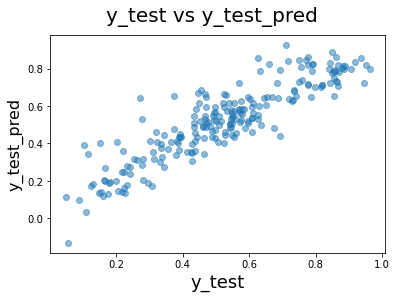

In [115]:
#scatter plot which shows the difference between y_test and y_test_pred i.e the predicted and the actual target values
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()